In [ ]:
# This notebook is a descendent from "Gradient Correction 1.ipynb" i  "Gradient Correction 2.ipynb"

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Change directory
%cd 'drive/My Drive/results/synthetic/'

/content/drive/My Drive/results/synthetic


In [3]:
#!pip uninstall gradient_correction  
!pip install https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main  #Temporarily installed, only for this session.

     \ 47.3 MB 5.1 MB/s
  Created wheel for gradient-correction: filename=gradient_correction-0.1-py3-none-any.whl size=10941 sha256=19702ba36658364c87be84719ef7b1996ded754ff4234390f5c8a948a3de924c
  Stored in directory: /tmp/pip-ephem-wheel-cache-_75jxkkv/wheels/03/4c/0a/9516d8fa386ed9a21d1aa50e8cc5b1f6d6f576195897b24409
Successfully built gradient-correction


In [4]:
import numpy as np
import gradient_correction
from gradient_correction import  helper, explain, model_zoo, geomath, plotter

In [5]:
ls

AUPR_EG.pdf                             Cosine_SG.pdf
AUPR_IG.pdf                             model_params/
AUPR_Saliency.pdf                       Performance_vs_EG_AUPR.pdf
AUPR_SG.pdf                             Performance_vs_EG_AUROC.pdf
AUROC_EG.pdf                            Performance_vs_EGCosine.pdf
AUROC_IG.pdf                            Performance_vs_IG_AUPR.pdf
AUROC_Saliency.pdf                      Performance_vs_IG_AUROC.pdf
AUROC_SG.pdf                            Performance_vs_IGCosine.pdf
cnn_deep_exponential_results.pickle     Performance_vs_SaliencyAUPR.pdf
cnn_deep_relu_results.pickle            Performance_vs_SaliencyAUROC.pdf
cnn_shallow_exponential_results.pickle  Performance_vs_SaliencyCosine.pdf
cnn_shallow_relu_results.pickle         Performance_vs_SG_AUPR.pdf
Cosine_EG.pdf                           Performance_vs_SG_AUROC.pdf
Cosine_IG.pdf                           Performance_vs_SGCosine.pdf
Cosine_Saliency.pdf                     Plot_notebook.ipynb


In [6]:
import pickle
file_cnn_deep_relu = open("cnn_deep_relu_results.pickle", "rb")
file_cnn_deep_exp = open("cnn_deep_exponential_results.pickle", "rb")
file_cnn_shallow_relu = open("cnn_shallow_relu_results.pickle", "rb")
file_cnn_shallow_exp = open("cnn_shallow_exponential_results.pickle", "rb")

In [7]:
results={}

In [8]:
results['deep_relu'] = pickle.load(file_cnn_deep_relu)
results['deep_exp'] = pickle.load(file_cnn_deep_exp)
results['shallow_relu'] = pickle.load(file_cnn_shallow_relu)
results['shallow_exp'] = pickle.load(file_cnn_shallow_exp)

In [9]:
for keys in results['deep_relu']:
    print(keys)

nucleotide_ground_truth
X_model
auc
angles
count_angles
ensemble_scores
ensemble_angles
saliency
smoothgrad
intgrad
expintgrad


In [10]:
Performance={}
Performance['deep_relu'] = np.array(results['deep_relu']['auc'])
Performance['deep_exp'] = np.array(results['deep_exp']['auc'])
Performance['shallow_relu'] = np.array(results['shallow_relu']['auc'])
Performance['shallow_exp'] = np.array(results['shallow_exp']['auc'])
print(Performance['deep_relu'].shape)

nucleotide_motif_labels = results['deep_relu']['nucleotide_ground_truth'] #Same for all models, because same data. 

(50,)


# Saliency

In [11]:
Cosine={}
Cosine['deep_relu']=np.array(results['deep_relu']['saliency']['cos_dist'])
Cosine['deep_exp']=np.array(results['deep_exp']['saliency']['cos_dist'])
Cosine['shallow_relu']=np.array(results['shallow_relu']['saliency']['cos_dist'])
Cosine['shallow_exp']=np.array(results['shallow_exp']['saliency']['cos_dist'])
Cosine_adj={}
Cosine_adj['deep_relu']=np.array(results['deep_relu']['saliency']['adj_cos_dist'])
Cosine_adj['deep_exp']=np.array(results['deep_exp']['saliency']['adj_cos_dist'])
Cosine_adj['shallow_relu']=np.array(results['shallow_relu']['saliency']['adj_cos_dist'])
Cosine_adj['shallow_exp']=np.array(results['shallow_exp']['saliency']['adj_cos_dist'])

Improvement={}
Improvement['deep_relu']=np.array(results['deep_relu']['saliency']['improvement'])
Improvement['deep_exp']=np.array(results['deep_exp']['saliency']['improvement'])
Improvement['shallow_relu']=np.array(results['shallow_relu']['saliency']['improvement'])
Improvement['shallow_exp']=np.array(results['shallow_exp']['saliency']['improvement'])


Auroc={}
Auroc['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['auroc_scores']), axis=-1)
Auroc['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['auroc_scores']), axis=-1)
Auroc['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['auroc_scores']), axis=-1)
Auroc['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['auroc_scores']), axis=-1)
Auroc_adj={}
Auroc_adj['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['auroc_adj_scores']), axis=-1)
Auroc_adj['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['auroc_adj_scores']), axis=-1)


Aupr={}
Aupr['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['aupr_scores']), axis=-1)
Aupr['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['aupr_scores']), axis=-1)
Aupr['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['aupr_scores']), axis=-1)
Aupr['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['aupr_scores']), axis=-1)
Aupr_adj={}
Aupr_adj['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['aupr_adj_scores']), axis=-1)
Aupr_adj['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['aupr_adj_scores']), axis=-1)

Angles={}
Angles['deep_relu']=np.array(results['deep_relu']['angles'])
Angles['deep_exp']=np.array(results['deep_exp']['angles'])
Angles['shallow_relu']=np.array(results['shallow_relu']['angles'])
Angles['shallow_exp']=np.array(results['shallow_exp']['angles'])

Ensemble_angles={}
Ensemble_angles['deep_relu']=np.array(results['deep_relu']['ensemble_angles'])
Ensemble_angles['deep_exp']=np.array(results['deep_exp']['ensemble_angles'])
Ensemble_angles['shallow_relu']=np.array(results['shallow_relu']['ensemble_angles'])
Ensemble_angles['shallow_exp']=np.array(results['shallow_exp']['ensemble_angles'])

Count_angles={}
Count_angles['deep_relu']=results['deep_relu']['count_angles']
Count_angles['deep_exp']=results['deep_exp']['count_angles']
Count_angles['shallow_relu']=results['shallow_relu']['count_angles']
Count_angles['shallow_exp']=results['shallow_exp']['count_angles']

scores_saliency = {}
scores_saliency['deep_relu']=np.array(results['deep_relu']['saliency']['scores'])
scores_saliency['deep_exp']=np.array(results['deep_exp']['saliency']['scores'])
scores_saliency['shallow_relu']=np.array(results['shallow_relu']['saliency']['scores'])
scores_saliency['shallow_exp']=np.array(results['shallow_exp']['saliency']['scores'])

scores_times_input = {}
scores_times_input['deep_relu']=np.array(results['deep_relu']['saliency']['scores_times_input'])
scores_times_input['deep_exp']=np.array(results['deep_exp']['saliency']['scores_times_input'])
scores_times_input['shallow_relu']=np.array(results['shallow_relu']['saliency']['scores_times_input'])
scores_times_input['shallow_exp']=np.array(results['shallow_exp']['saliency']['scores_times_input'])

scores_times_input_adj = {}
scores_times_input_adj['deep_relu']=np.array(results['deep_relu']['saliency']['adj_scores_times_input'])
scores_times_input_adj['deep_exp']=np.array(results['deep_exp']['saliency']['adj_scores_times_input'])
scores_times_input_adj['shallow_relu']=np.array(results['shallow_relu']['saliency']['adj_scores_times_input'])
scores_times_input_adj['shallow_exp']=np.array(results['shallow_exp']['saliency']['adj_scores_times_input'])


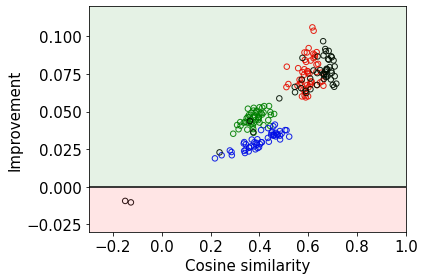

In [ ]:
# Saliency Cosine
file_save = 'Cosine_Saliency.pdf'
plotter.plot_improvement(Cosine, Cosine_adj,  x_min=-0.3, x_max=1, y_min=-0.03, y_max=0.12, x_label = 'Cosine similarity', file_save = file_save)

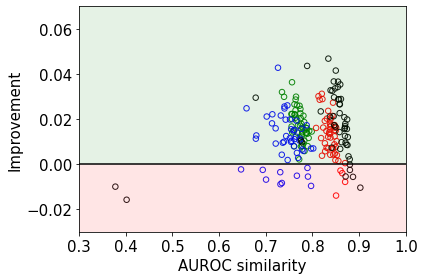

In [ ]:
#Saliency AUROC
file_save = 'AUROC_Saliency.pdf'
plotter.plot_improvement(Auroc, Auroc_adj,  x_min=0.3, x_max=1, y_min=-0.03, y_max=0.07, x_label = 'AUROC similarity', file_save = file_save)

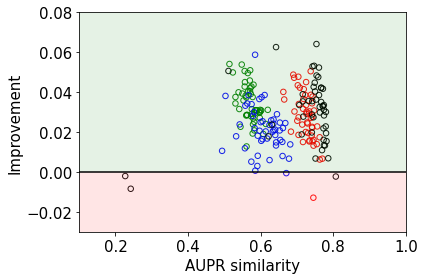

In [ ]:
#Saliency AUPR
file_save = 'AUPR_Saliency.pdf'
plotter.plot_improvement(Aupr, Aupr_adj,  x_min=0.1, x_max=1, y_min=-0.03, y_max=0.08, x_label = 'AUPR similarity', file_save = file_save)

Interpretability vs Performance


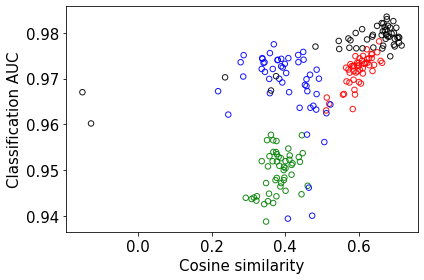

In [ ]:
# Saliency Cosine
file_save = 'Performance_vs_SaliencyCosine.pdf'
plotter.plot_attribution_vs_performance(Cosine, Performance, x_label = 'Cosine similarity', file_save = file_save)

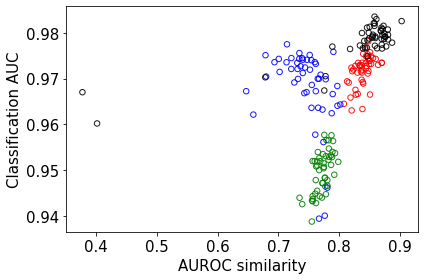

In [ ]:
# SaliencyAUROC
file_save = 'Performance_vs_SaliencyAUROC.pdf'
plotter.plot_attribution_vs_performance(Auroc, Performance, x_label = 'AUROC similarity', file_save = file_save)

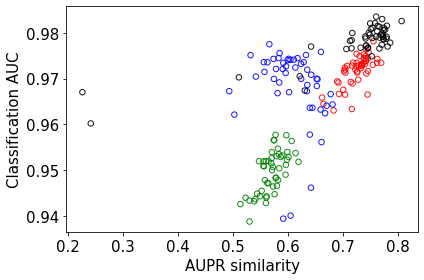

In [ ]:
# SaliencyAUPR
file_save = 'Performance_vs_SaliencyAUPR.pdf'
plotter.plot_attribution_vs_performance(Aupr, Performance, x_label = 'AUPR similarity', file_save = file_save)

# ANGLE STATISTICS

# model_ = 'deep_exp'

In [18]:
model_ = 'deep_exp'

sine = np.array(Angles[model_])
improvement =np.array(Improvement[model_])
wild_saliency = scores_times_input[model_]
wild_saliency_adj = scores_times_input_adj[model_]
L=len(scores_saliency[model_])

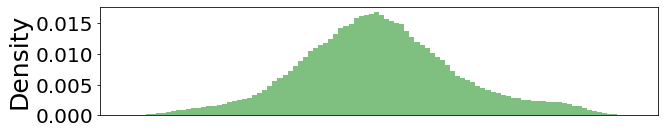

In [19]:
#POSITIVE nucleotides (nucleotides belonging to motifs): Angle distribution.
index_ = nucleotide_motif_labels
plotter.plot_angle_distribution(index_, L, sine, ticks=[0.0, 0.005, 0.01, 0.015], fontsize=25, y_label='Density')

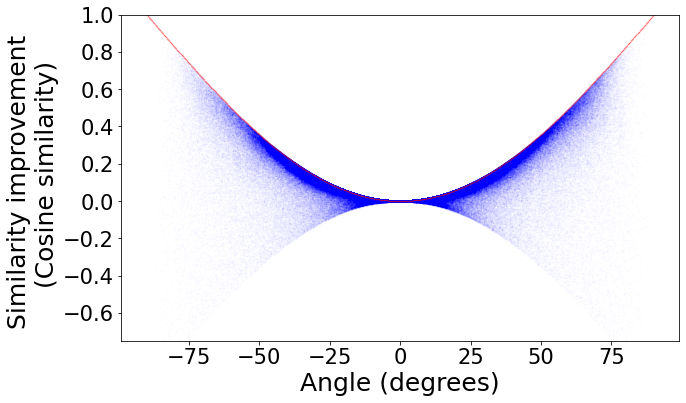

In [ ]:
#POSITIVE nucleotides (nucleotides belonging to motifs): Improvement versus angles.
index_ = nucleotide_motif_labels
plotter.plot_improvement_vs_angle_motif(index_, L, sine, improvement, fontsize=25)

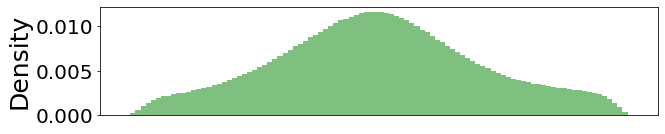

In [21]:
#NEGATIVE nucleotides (nucleotides not belonging to motifs): Angle distribution.
index_ = np.logical_not(nucleotide_motif_labels)
plotter.plot_angle_distribution(index_, L, sine, ticks=[0.0, 0.005, 0.01, 0.015], fontsize=25, y_label='Density')

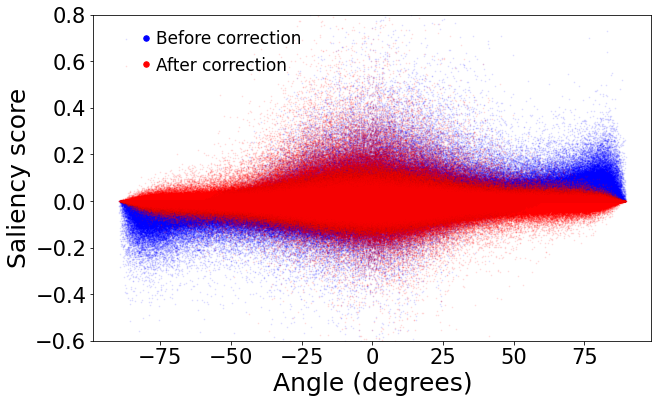

In [22]:
# NEGATIVE nucleotides (nucleotides not belonging to motifs): Spurious saliency scores before and after correction.
index_ = np.logical_not(nucleotide_motif_labels)
plotter.plot_improvement_vs_angle_nonmotif(index_, L, sine, wild_saliency, wild_saliency_adj, fontsize=25)

# model_ = 'deep_relu'

In [23]:
model_ = 'deep_relu'

sine = np.array(Angles[model_])
improvement =np.array(Improvement[model_])
wild_saliency = scores_times_input[model_]
wild_saliency_adj = scores_times_input_adj[model_]
L=len(scores_saliency[model_])

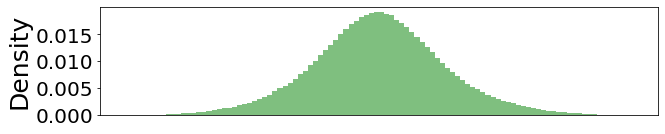

In [24]:
#POSITIVE nucleotides (nucleotides belonging to motifs): Angle distribution.
index_ = nucleotide_motif_labels
plotter.plot_angle_distribution(index_, L, sine, ticks=[0.0, 0.005, 0.01, 0.015], fontsize=25, y_label='Density')

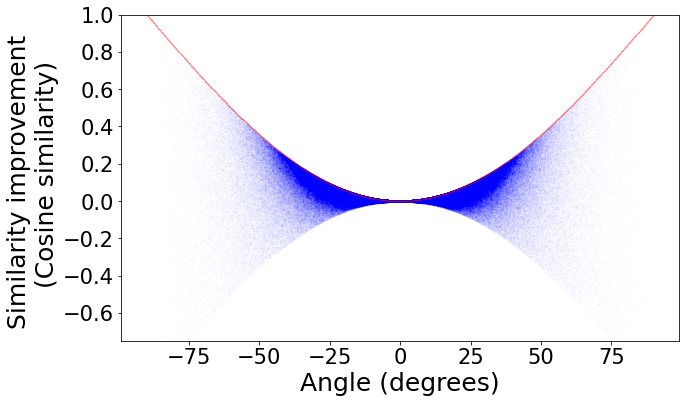

In [25]:
#POSITIVE nucleotides (nucleotides belonging to motifs): Improvement versus angles.
index_ = nucleotide_motif_labels
plotter.plot_improvement_vs_angle_motif(index_, L, sine, improvement, fontsize=25)

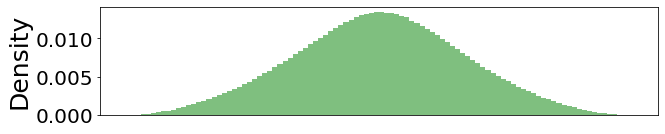

In [26]:
#NEGATIVE nucleotides (nucleotides not belonging to motifs): Angle distribution.
index_ = np.logical_not(nucleotide_motif_labels)
plotter.plot_angle_distribution(index_, L, sine, ticks=[0.0, 0.005, 0.01, 0.015], fontsize=25, y_label='Density')

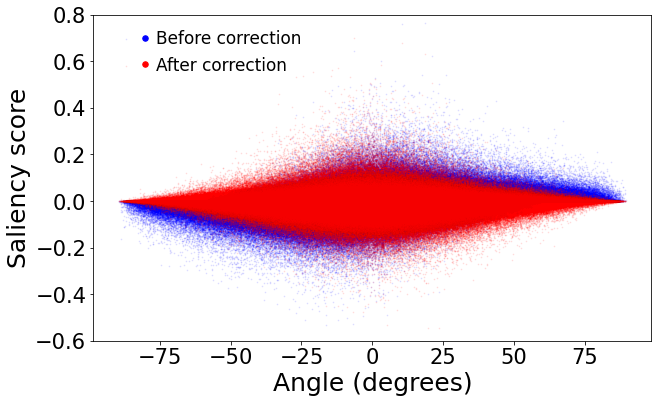

In [27]:
# NEGATIVE nucleotides (nucleotides not belonging to motifs): Spurious saliency scores before and after correction.
index_ = np.logical_not(nucleotide_motif_labels)
plotter.plot_improvement_vs_angle_nonmotif(index_, L, sine, wild_saliency, wild_saliency_adj, fontsize=25)

# model_ = 'shallow_exp'

In [28]:
model_ = 'shallow_exp'

sine = np.array(Angles[model_])
improvement =np.array(Improvement[model_])
wild_saliency = scores_times_input[model_]
wild_saliency_adj = scores_times_input_adj[model_]
L=len(scores_saliency[model_])

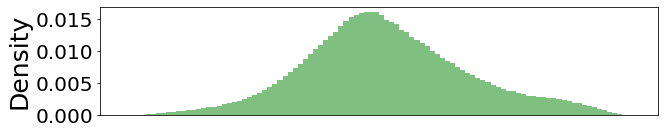

In [29]:
#POSITIVE nucleotides (nucleotides belonging to motifs): Angle distribution.
index_ = nucleotide_motif_labels
plotter.plot_angle_distribution(index_, L, sine, ticks=[0.0, 0.005, 0.01, 0.015], fontsize=25, y_label='Density')

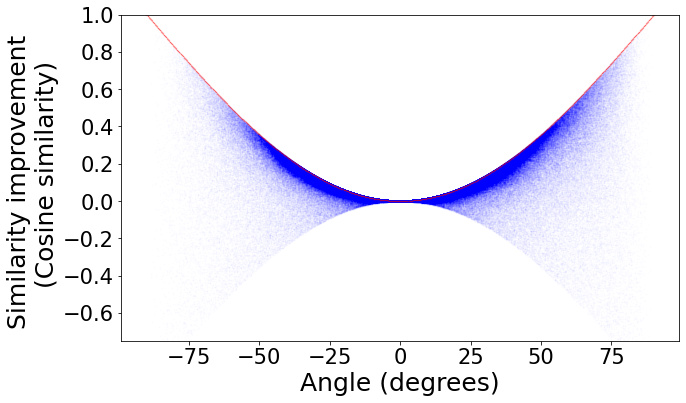

In [30]:
#POSITIVE nucleotides (nucleotides belonging to motifs): Improvement versus angles.
index_ = nucleotide_motif_labels
plotter.plot_improvement_vs_angle_motif(index_, L, sine, improvement, fontsize=25)

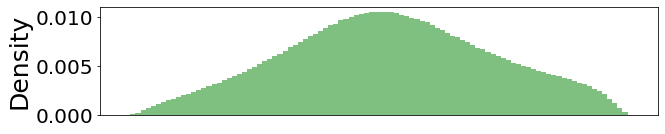

In [31]:
#NEGATIVE nucleotides (nucleotides not belonging to motifs): Angle distribution.
index_ = np.logical_not(nucleotide_motif_labels)
plotter.plot_angle_distribution(index_, L, sine, ticks=[0.0, 0.005, 0.01, 0.015], fontsize=25, y_label='Density')

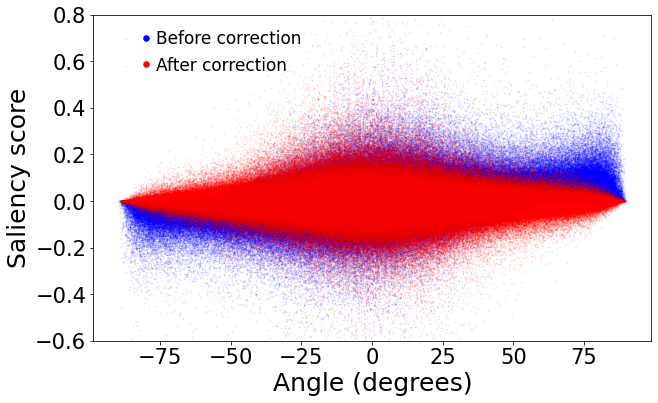

In [32]:
# NEGATIVE nucleotides (nucleotides not belonging to motifs): Spurious saliency scores before and after correction.
index_ = np.logical_not(nucleotide_motif_labels)
plotter.plot_improvement_vs_angle_nonmotif(index_, L, sine, wild_saliency, wild_saliency_adj, fontsize=25)

# model_ = 'shallow_relu'

In [33]:
model_ = 'shallow_relu'

sine = np.array(Angles[model_])
improvement =np.array(Improvement[model_])
wild_saliency = scores_times_input[model_]
wild_saliency_adj = scores_times_input_adj[model_]
L=len(scores_saliency[model_])

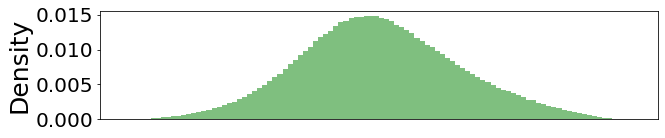

In [34]:
#POSITIVE nucleotides (nucleotides belonging to motifs): Angle distribution.
index_ = nucleotide_motif_labels
plotter.plot_angle_distribution(index_, L, sine, ticks=[0.0, 0.005, 0.01, 0.015], fontsize=25, y_label='Density')

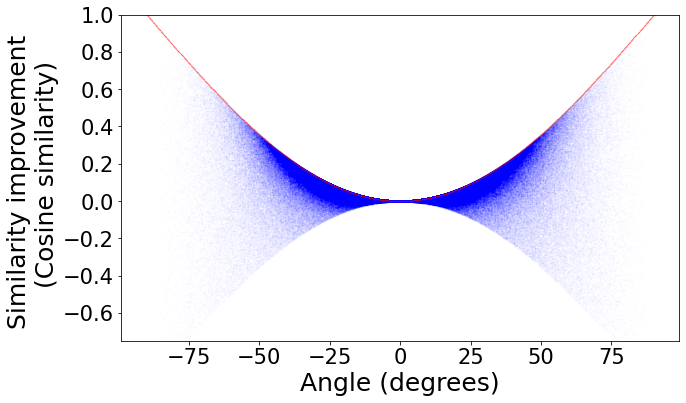

In [35]:
#POSITIVE nucleotides (nucleotides belonging to motifs): Improvement versus angles.
index_ = nucleotide_motif_labels
plotter.plot_improvement_vs_angle_motif(index_, L, sine, improvement, fontsize=25)

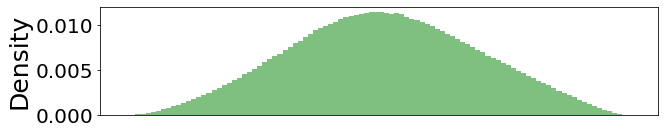

In [36]:
#NEGATIVE nucleotides (nucleotides not belonging to motifs): Angle distribution.
index_ = np.logical_not(nucleotide_motif_labels)
plotter.plot_angle_distribution(index_, L, sine, ticks=[0.0, 0.005, 0.01, 0.015], fontsize=25, y_label='Density')

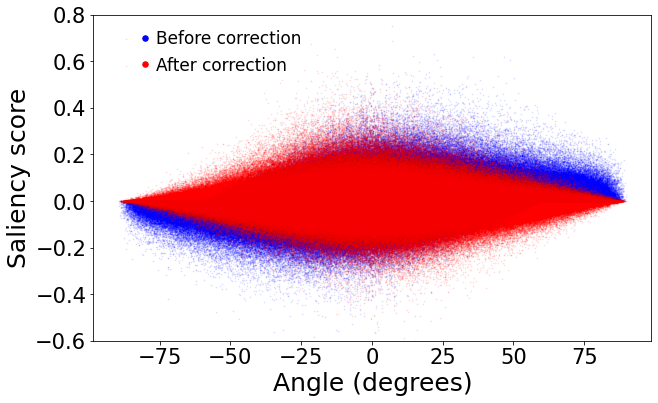

In [37]:
# NEGATIVE nucleotides (nucleotides not belonging to motifs): Spurious saliency scores before and after correction.
index_ = np.logical_not(nucleotide_motif_labels)
plotter.plot_improvement_vs_angle_nonmotif(index_, L, sine, wild_saliency, wild_saliency_adj, fontsize=25)

# FURTHER ANGLE STATISTICS

(-2.0, 50.0)

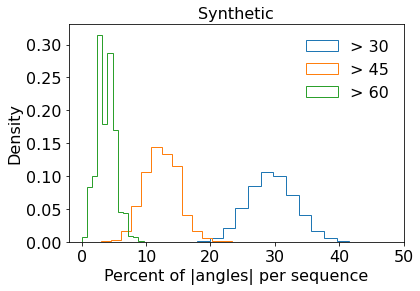

In [42]:
#PLOT 
import matplotlib.pyplot as plt
cnn_model = 'deep_relu'

model_=""
if (cnn_model=='deep_relu'): model_ = "CNN-deep-relu"
if (cnn_model=='deep_exp'): model_ = "CNN-deep-exp"
if (cnn_model=='shallow_relu'): model_ = "CNN-shallow-relu"
if (cnn_model=='shallow_exp'): model_ = "CNN-shallow-exp"

plt.hist(Count_angles[cnn_model]['30'],15,  histtype='step', stacked=True, fill=False, label = '> 30', density=True)
plt.hist(Count_angles[cnn_model]['45'],15,  histtype='step', stacked=True, fill=False, label = '> 45', density=True)
plt.hist(Count_angles[cnn_model]['60'],15,  histtype='step', stacked=True, fill=False, label = '> 60', density=True)

plt.ylabel('Density', fontsize=16)
plt.xlabel('Percent of |angles| per sequence', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks([0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30], fontsize=16)
plt.legend(loc='upper right', fontsize=16, frameon=False);
plt.title('Synthetic', fontsize=16, loc='center', pad=None)
plt.xlim(-2,50)

In [43]:
print(np.average(Count_angles[cnn_model]['30']))
print(np.average(Count_angles[cnn_model]['45']))
print(np.average(Count_angles[cnn_model]['60']))

29.5069
12.31788
3.70454


In [44]:
print(Ensemble_angles['deep_relu'].shape)
print(Angles['deep_relu'].shape)

(500, 200)
(50, 500, 200)


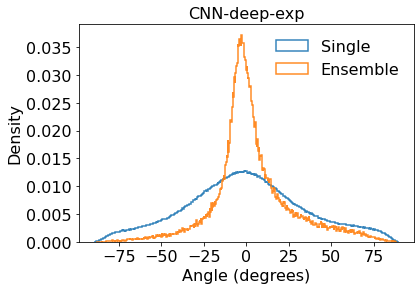

In [47]:
#Plot all experiments angle distribution
import matplotlib.pyplot as plt
cnn_model='deep_exp'

model_=""
if (cnn_model=='deep_relu'): model_ = "CNN-deep-relu"
if (cnn_model=='deep_exp'): model_ = "CNN-deep-exp"
if (cnn_model=='shallow_relu'): model_ = "CNN-shallow-relu"
if (cnn_model=='shallow_exp'): model_ = "CNN-shallow-exp"

angles_flatten = np.reshape(Angles[cnn_model], -1)
ensemble_angles_flatten = np.reshape(Ensemble_angles[cnn_model], -1)

#plt.figure(figsize=(10,2))
plt.ylabel('Density', fontsize=16)  
plt.xlabel('Angle (degrees)', fontsize=16)
plt.xticks(fontsize=16)
plt.title(model_, fontsize=16)
#plt.ylim((0,0.03))
#plt.tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)   #Turn off x ticks
plt.yticks(fontsize=16)

plt.hist(angles_flatten, 500, density=True, alpha=0.9, histtype='step', linewidth=1.5, label = 'Single')
plt.hist(ensemble_angles_flatten, 500, density=True, alpha=0.9, histtype='step', linewidth=1.5, label = 'Ensemble')

plt.legend(loc='upper right', fontsize=16, frameon=False);


# Integrated gradient

In [48]:
Cosine={}
Cosine['deep_relu']=np.array(results['deep_relu']['intgrad']['cos_dist'])
Cosine['deep_exp']=np.array(results['deep_exp']['intgrad']['cos_dist'])
Cosine['shallow_relu']=np.array(results['shallow_relu']['intgrad']['cos_dist'])
Cosine['shallow_exp']=np.array(results['shallow_exp']['intgrad']['cos_dist'])
Cosine_adj={}
Cosine_adj['deep_relu']=np.array(results['deep_relu']['intgrad']['adj_cos_dist'])
Cosine_adj['deep_exp']=np.array(results['deep_exp']['intgrad']['adj_cos_dist'])
Cosine_adj['shallow_relu']=np.array(results['shallow_relu']['intgrad']['adj_cos_dist'])
Cosine_adj['shallow_exp']=np.array(results['shallow_exp']['intgrad']['adj_cos_dist'])

Improvement={}
Improvement['deep_relu']=np.array(results['deep_relu']['intgrad']['improvement'])
Improvement['deep_exp']=np.array(results['deep_exp']['intgrad']['improvement'])
Improvement['shallow_relu']=np.array(results['shallow_relu']['intgrad']['improvement'])
Improvement['shallow_exp']=np.array(results['shallow_exp']['intgrad']['improvement'])


Auroc={}
Auroc['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['auroc_scores']), axis=-1)
Auroc['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['auroc_scores']), axis=-1)
Auroc['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['auroc_scores']), axis=-1)
Auroc['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['auroc_scores']), axis=-1)
Auroc_adj={}
Auroc_adj['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['auroc_adj_scores']), axis=-1)


Aupr={}
Aupr['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['aupr_scores']), axis=-1)
Aupr['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['aupr_scores']), axis=-1)
Aupr['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['aupr_scores']), axis=-1)
Aupr['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['aupr_scores']), axis=-1)
Aupr_adj={}
Aupr_adj['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['aupr_adj_scores']), axis=-1)

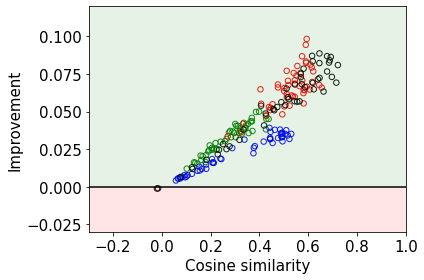

In [ ]:
# IG Cosine
file_save = 'Cosine_IG.pdf'
plotter.plot_improvement(Cosine, Cosine_adj,  x_min=-0.3, x_max=1, y_min=-0.03, y_max=0.12, x_label = 'Cosine similarity', file_save = file_save)

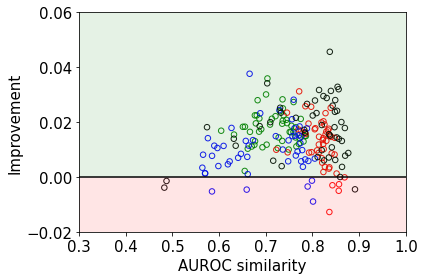

In [51]:
#IG AUROC
file_save = 'AUROC_IG.pdf'
plotter.plot_improvement(Auroc, Auroc_adj,  x_min=0.3, x_max=1, y_min=-0.02, y_max=0.06, x_label = 'AUROC similarity', file_save = file_save)

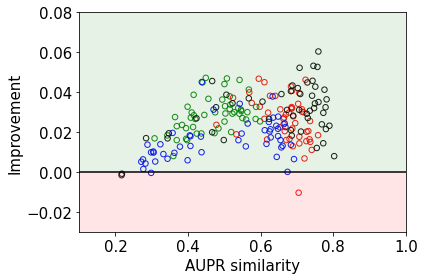

In [52]:
#IG AUPR
file_save = 'AUPR_IG.pdf'
plotter.plot_improvement(Aupr, Aupr_adj,  x_min=0.1, x_max=1, y_min=-0.03, y_max=0.08, x_label = 'AUPR similarity', file_save = file_save)

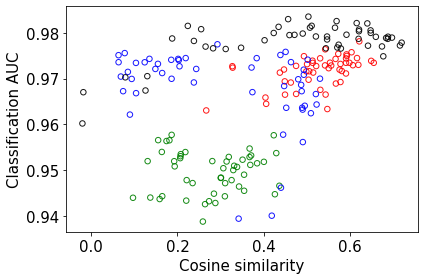

In [53]:
# IG Cosine
file_save = 'Performance_vs_IGCosine.pdf'
plotter.plot_attribution_vs_performance(Cosine, Performance, x_label = 'Cosine similarity', file_save = file_save)

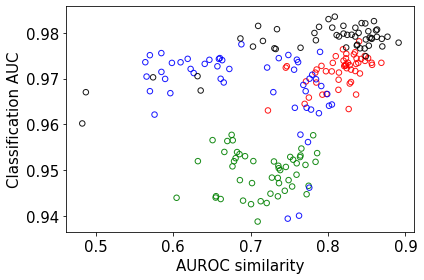

In [54]:
# IG AUROC
file_save = 'Performance_vs_IG_AUROC.pdf'
plotter.plot_attribution_vs_performance(Auroc, Performance, x_label = 'AUROC similarity', file_save = file_save)

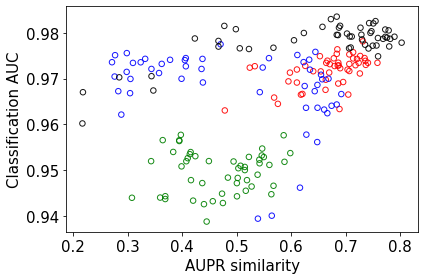

In [55]:
# IG AUPR
file_save = 'Performance_vs_IG_AUPR.pdf'
plotter.plot_attribution_vs_performance(Aupr, Performance, x_label = 'AUPR similarity', file_save = file_save)

# Smoothgrad

In [56]:
Cosine={}
Cosine['deep_relu']=np.array(results['deep_relu']['smoothgrad']['cos_dist'])
Cosine['deep_exp']=np.array(results['deep_exp']['smoothgrad']['cos_dist'])
Cosine['shallow_relu']=np.array(results['shallow_relu']['smoothgrad']['cos_dist'])
Cosine['shallow_exp']=np.array(results['shallow_exp']['smoothgrad']['cos_dist'])
Cosine_adj={}
Cosine_adj['deep_relu']=np.array(results['deep_relu']['smoothgrad']['adj_cos_dist'])
Cosine_adj['deep_exp']=np.array(results['deep_exp']['smoothgrad']['adj_cos_dist'])
Cosine_adj['shallow_relu']=np.array(results['shallow_relu']['smoothgrad']['adj_cos_dist'])
Cosine_adj['shallow_exp']=np.array(results['shallow_exp']['smoothgrad']['adj_cos_dist'])

Auroc={}
Auroc['deep_relu']=np.average(np.array(results['deep_relu']['smoothgrad']['auroc_scores']), axis=-1)
Auroc['deep_exp']=np.average(np.array(results['deep_exp']['smoothgrad']['auroc_scores']), axis=-1)
Auroc['shallow_relu']=np.average(np.array(results['shallow_relu']['smoothgrad']['auroc_scores']), axis=-1)
Auroc['shallow_exp']=np.average(np.array(results['shallow_exp']['smoothgrad']['auroc_scores']), axis=-1)
Auroc_adj={}
Auroc_adj['deep_relu']=np.average(np.array(results['deep_relu']['smoothgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['deep_exp']=np.average(np.array(results['deep_exp']['smoothgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['smoothgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['smoothgrad']['auroc_adj_scores']), axis=-1)

Aupr={}
Aupr['deep_relu']=np.average(np.array(results['deep_relu']['smoothgrad']['aupr_scores']), axis=-1)
Aupr['deep_exp']=np.average(np.array(results['deep_exp']['smoothgrad']['aupr_scores']), axis=-1)
Aupr['shallow_relu']=np.average(np.array(results['shallow_relu']['smoothgrad']['aupr_scores']), axis=-1)
Aupr['shallow_exp']=np.average(np.array(results['shallow_exp']['smoothgrad']['aupr_scores']), axis=-1)
Aupr_adj={}
Aupr_adj['deep_relu']=np.average(np.array(results['deep_relu']['smoothgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['deep_exp']=np.average(np.array(results['deep_exp']['smoothgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['smoothgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['smoothgrad']['aupr_adj_scores']), axis=-1)

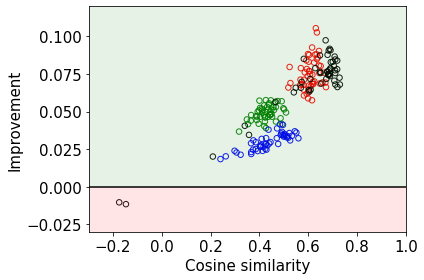

In [59]:
# SG Cosine
file_save = 'Cosine_SG.pdf'
plotter.plot_improvement(Cosine, Cosine_adj,  x_min=-0.3, x_max=1, y_min=-0.03, y_max=0.12, x_label = 'Cosine similarity', file_save = file_save)

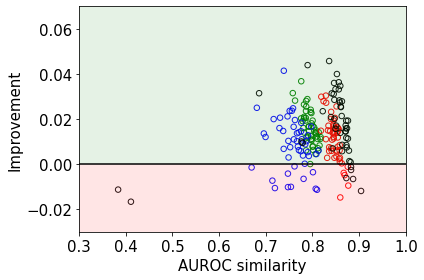

In [60]:
#SG AUROC
file_save = 'AUROC_SG.pdf'
plotter.plot_improvement(Auroc, Auroc_adj,  x_min=0.3, x_max=1, y_min=-0.03, y_max=0.07, x_label = 'AUROC similarity', file_save = file_save)

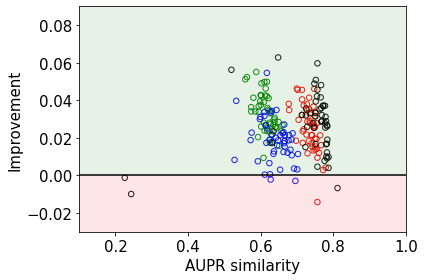

In [61]:
#SG AUPR
file_save = 'AUPR_SG.pdf'
plotter.plot_improvement(Aupr, Aupr_adj,  x_min=0.1, x_max=1, y_min=-0.03, y_max=0.09, x_label = 'AUPR similarity', file_save = file_save)

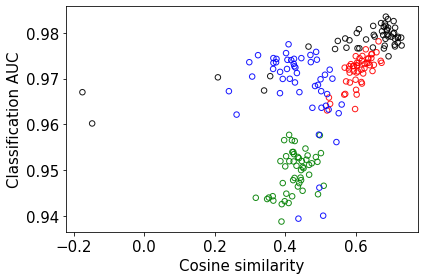

In [62]:
# SG Cosine
file_save = 'Performance_vs_SGCosine.pdf'
plotter.plot_attribution_vs_performance(Cosine, Performance, x_label = 'Cosine similarity', file_save = file_save)

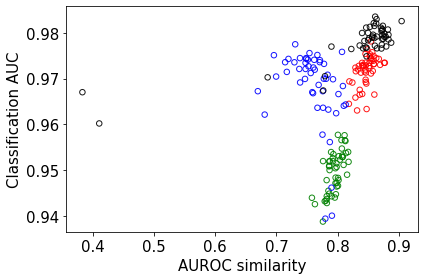

In [63]:
# SG AUROC
file_save = 'Performance_vs_SG_AUROC.pdf'
plotter.plot_attribution_vs_performance(Auroc, Performance, x_label = 'AUROC similarity', file_save = file_save)

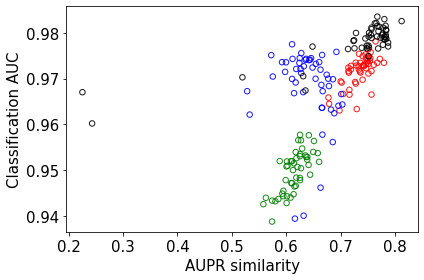

In [64]:
# SG AUPR
file_save = 'Performance_vs_SG_AUPR.pdf'
plotter.plot_attribution_vs_performance(Aupr, Performance, x_label = 'AUPR similarity', file_save = file_save)

# Expintgrad

In [65]:
Cosine={}
Cosine['deep_relu']=np.array(results['deep_relu']['expintgrad']['cos_dist'])
Cosine['deep_exp']=np.array(results['deep_exp']['expintgrad']['cos_dist'])
Cosine['shallow_relu']=np.array(results['shallow_relu']['expintgrad']['cos_dist'])
Cosine['shallow_exp']=np.array(results['shallow_exp']['expintgrad']['cos_dist'])
Cosine_adj={}
Cosine_adj['deep_relu']=np.array(results['deep_relu']['expintgrad']['adj_cos_dist'])
Cosine_adj['deep_exp']=np.array(results['deep_exp']['expintgrad']['adj_cos_dist'])
Cosine_adj['shallow_relu']=np.array(results['shallow_relu']['expintgrad']['adj_cos_dist'])
Cosine_adj['shallow_exp']=np.array(results['shallow_exp']['expintgrad']['adj_cos_dist'])

Auroc={}
Auroc['deep_relu']=np.average(np.array(results['deep_relu']['expintgrad']['auroc_scores']), axis=-1)
Auroc['deep_exp']=np.average(np.array(results['deep_exp']['expintgrad']['auroc_scores']), axis=-1)
Auroc['shallow_relu']=np.average(np.array(results['shallow_relu']['expintgrad']['auroc_scores']), axis=-1)
Auroc['shallow_exp']=np.average(np.array(results['shallow_exp']['expintgrad']['auroc_scores']), axis=-1)
Auroc_adj={}
Auroc_adj['deep_relu']=np.average(np.array(results['deep_relu']['expintgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['deep_exp']=np.average(np.array(results['deep_exp']['expintgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['expintgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['expintgrad']['auroc_adj_scores']), axis=-1)

Aupr={}
Aupr['deep_relu']=np.average(np.array(results['deep_relu']['expintgrad']['aupr_scores']), axis=-1)
Aupr['deep_exp']=np.average(np.array(results['deep_exp']['expintgrad']['aupr_scores']), axis=-1)
Aupr['shallow_relu']=np.average(np.array(results['shallow_relu']['expintgrad']['aupr_scores']), axis=-1)
Aupr['shallow_exp']=np.average(np.array(results['shallow_exp']['expintgrad']['aupr_scores']), axis=-1)
Aupr_adj={}
Aupr_adj['deep_relu']=np.average(np.array(results['deep_relu']['expintgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['deep_exp']=np.average(np.array(results['deep_exp']['expintgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['expintgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['expintgrad']['aupr_adj_scores']), axis=-1)

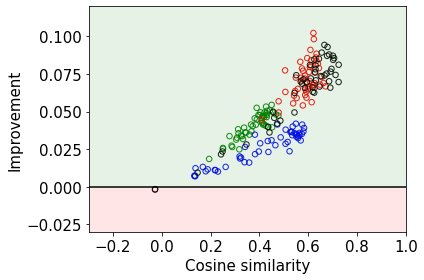

In [69]:
# EG Cosine
file_save = 'Cosine_EG.pdf'
plotter.plot_improvement(Cosine, Cosine_adj,  x_min=-0.3, x_max=1, y_min=-0.03, y_max=0.12, x_label = 'Cosine similarity', file_save = file_save)

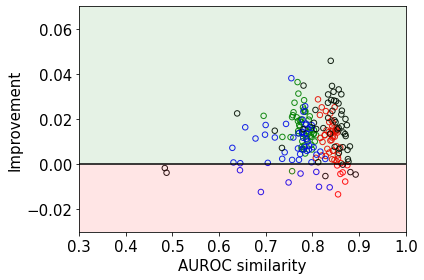

In [70]:
#EG AUROC
file_save = 'AUROC_EG.pdf'
plotter.plot_improvement(Auroc, Auroc_adj,  x_min=0.3, x_max=1, y_min=-0.03, y_max=0.07, x_label = 'AUROC similarity', file_save = file_save)

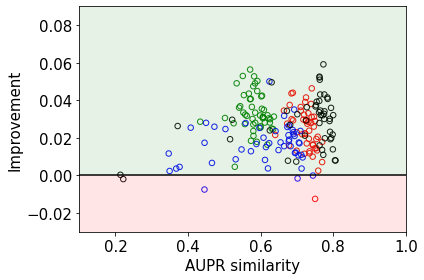

In [71]:
#EG AUPR
file_save = 'AUPR_EG.pdf'
plotter.plot_improvement(Aupr, Aupr_adj,  x_min=0.1, x_max=1, y_min=-0.03, y_max=0.09, x_label = 'AUPR similarity', file_save = file_save)

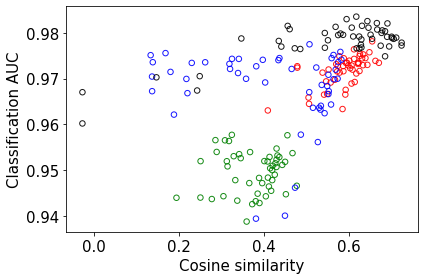

In [72]:
# EG Cosine
file_save = 'Performance_vs_EGCosine.pdf'
plotter.plot_attribution_vs_performance(Cosine, Performance, x_label = 'Cosine similarity', file_save = file_save)

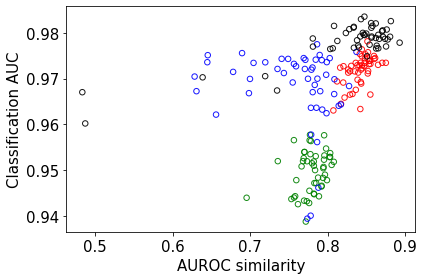

In [73]:
# EG AUROC
file_save = 'Performance_vs_EG_AUROC.pdf'
plotter.plot_attribution_vs_performance(Auroc, Performance, x_label = 'AUROC similarity', file_save = file_save)

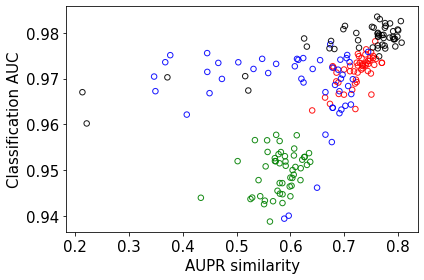

In [74]:
# EG AUPR
file_save = 'Performance_vs_EG_AUPR.pdf'
plotter.plot_attribution_vs_performance(Aupr, Performance, x_label = 'AUPR similarity', file_save = file_save)

# ANECDOTAL (last...)

In [75]:
! pip install logomaker
import logomaker

     |████████████████████████████████| 11.8 MB 11.5 MB/s 


In [76]:
def plot_synth_sequences(saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s):

    import logomaker
    import pandas as pd
    import matplotlib.pyplot as plt
    from matplotlib.ticker import FormatStrFormatter
    
    sine_dimensionsadapted=np.expand_dims(sine,3)

    # Raw saliency 
    N, L, A = saliency_map_raw[run_].shape
    for i in range(s,s+1):   #for i in range(len(X)):
        counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
        for a in range(A):
            for l in range(L):
                counts_df.iloc[l,a] = saliency_map_raw[run_][i][l,a]

        logomaker.Logo(counts_df, figsize=(25,2))
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.set_ylabel('Saliency', fontsize=20)
        fig = plt.gcf()
        

    # Plot angles
    N, L, A  = sine_dimensionsadapted[run_].shape
    for i in range(s,s+1):   #for i in range(len(X)):
        counts_df = pd.DataFrame(data=0.0, columns=list('∧'), index=list(range(L)))
        for a in range(A):
            for l in range(L):
                counts_df.iloc[l,a] = sine_dimensionsadapted[run_][i][l,a] 

        logomaker.Logo(counts_df, figsize=(25,2))
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.set_ylabel('Angle', fontsize=20)
        fig = plt.gcf()

    # Corrected saliency 
    N, L, A = saliency_map_raw_CORRECTED[run_].shape
    for i in range(s,s+1):   #for i in range(len(X)):
        counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
        for a in range(A):
            for l in range(L):
                counts_df.iloc[l,a] = saliency_map_raw_CORRECTED[run_][i][l,a]

        logomaker.Logo(counts_df, figsize=(25,2))
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.set_ylabel('Saliency cor.', fontsize=20)
        fig = plt.gcf()

    # Ensemble saliency 
    N, L, A = saliency_map_raw_ensemble.shape
    for i in range(s,s+1):   #for i in range(len(X)):
        counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
        for a in range(A):
            for l in range(L):
                counts_df.iloc[l,a] = saliency_map_raw_ensemble[i][l,a]

        logomaker.Logo(counts_df, figsize=(25,2))
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.set_ylabel('Ground truth', fontsize=20)
        fig = plt.gcf()



In [77]:
def plot_synth_sequences_cut(experiment, saliency_map_raw, saliency_map_raw_CORRECTED, saliency_map_raw_ensemble, sine, run_, s, b1, b2):

    import logomaker
    import pandas as pd
    import matplotlib.pyplot as plt
    from matplotlib.ticker import FormatStrFormatter

    sine_dimensionsadapted=np.expand_dims(sine,3)

    saliency_map_raw_CUT= saliency_map_raw[run_,:,b1:b2] 
    sine_dimensionsadapted_CUT=sine_dimensionsadapted[run_,:,b1:b2] 
    saliency_map_raw_CORRECTED_CUT= saliency_map_raw_CORRECTED[run_,:,b1:b2] 
    saliency_map_raw_ensemble_CUT = saliency_map_raw_ensemble[:,b1:b2] 


    # PLOT default saliency
    N, L, A = saliency_map_raw_CUT.shape
    for i in range(s,s+1):   
        counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
        for a in range(A):
            for l in range(L):
                counts_df.iloc[l,a] = saliency_map_raw_CUT[i][l,a]
        logomaker.Logo(counts_df, figsize=(25,2))
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.xticks([0,10,20,30,40])
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.figure.set_size_inches(7, 2)
        ax.set_ylabel('Saliency', fontsize=20)
        ax.tick_params(axis="x", labelsize=18)
        ax.tick_params(axis="y", labelsize=18)
        fig = plt.gcf()
    plt.title(experiment, fontsize=16, loc='center', pad=None)

    # PLOT angle
    N, L, A = sine_dimensionsadapted_CUT.shape
    for i in range(s,s+1):   
        counts_df = pd.DataFrame(data=0.0, columns=list('∧'), index=list(range(L)))
        for a in range(A):
            for l in range(L):
                counts_df.iloc[l,a] = (sine_dimensionsadapted_CUT)[i][l,a] 
        logomaker.Logo(counts_df, figsize=(25,2))
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.xticks([0,10,20,30,40])
        plt.ylim((-80,80)) 
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.figure.set_size_inches(7, 2)
        ax.set_ylabel('Angle', fontsize=20)
        ax.tick_params(axis="x", labelsize=18)
        ax.tick_params(axis="y", labelsize=18)    
        fig = plt.gcf()


    # Plot corrected saliency
    N, L, A = saliency_map_raw_CUT.shape
    for i in range(s,s+1):   
        counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
        for a in range(A):
            for l in range(L):
                counts_df.iloc[l,a] = saliency_map_raw_CORRECTED_CUT[i][l,a]
        logomaker.Logo(counts_df, figsize=(25,2))
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.xticks([0,10,20,30,40])
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.figure.set_size_inches(7, 2)
        ax.set_ylabel('Saliency cor.', fontsize=20)
        ax.tick_params(axis="x", labelsize=18)
        ax.tick_params(axis="y", labelsize=18)    
        fig = plt.gcf()


# Plot ensemble
    N, L, A = saliency_map_raw_CUT.shape
    for i in range(s,s+1):   
        counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
        for a in range(A):
            for l in range(L):
                counts_df.iloc[l,a] = saliency_map_raw_ensemble_CUT[i][l,a]
        logomaker.Logo(counts_df, figsize=(25,2))
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.xticks([0,10,20,30,40])
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.figure.set_size_inches(7, 2)
        ax.set_ylabel('Ground truth', fontsize=20)
        ax.tick_params(axis="x", labelsize=18)
        ax.tick_params(axis="y", labelsize=18)    
        fig = plt.gcf()   

# CNN-deep-exp

In [78]:
model_ = 'deep_exp'

In [79]:
saliency_map_raw = scores_saliency[model_]
sine = np.array(Angles[model_])
saliency_map_raw_CORRECTED = np.array(saliency_map_raw) - 0.25 * np.sum(saliency_map_raw, axis=-1, keepdims=True) 
ground_truth = results[model_]['X_model'] - 0.25 #uninformative positions ([0.25, 0.25, 0.25, 0.25] should correspond to [0,0,0,0] signal)

In [80]:
run_=1 #Pick a run
s=0 #Pick a sequence 

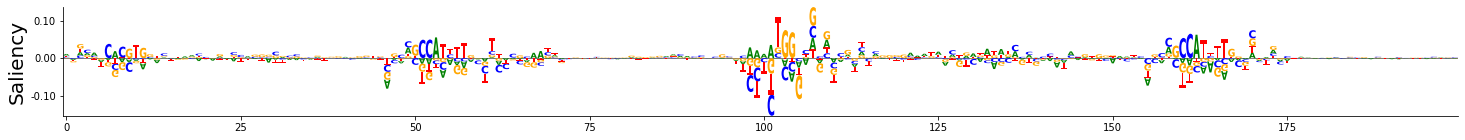

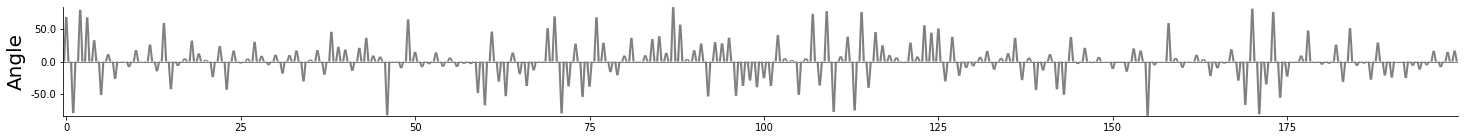

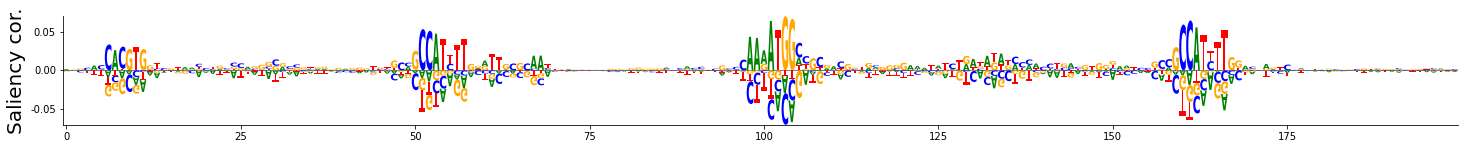

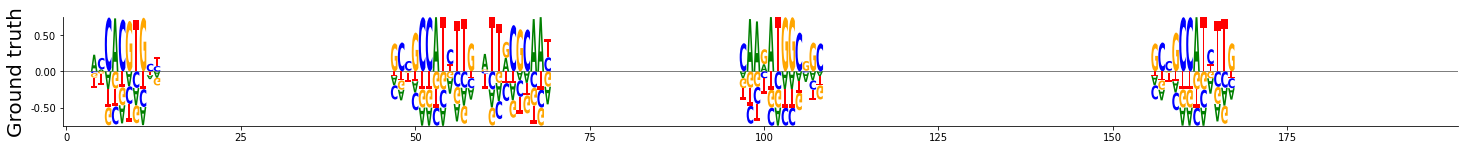

In [81]:
plot_synth_sequences(saliency_map_raw, saliency_map_raw_CORRECTED, ground_truth, sine, run_, s)

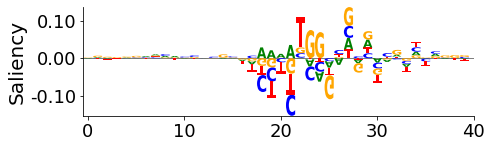

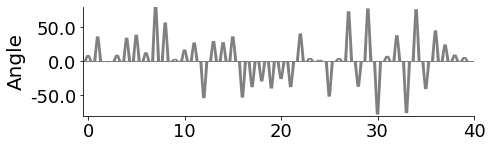

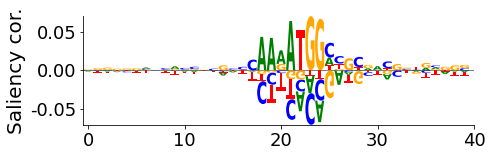

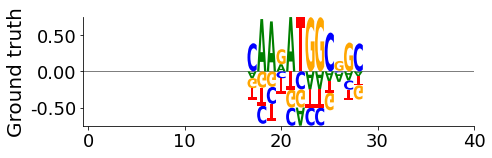

In [83]:
#Select a CUT (starting and ending nucleotide, from the graph above, to show a smaller snippet)
b1=80  
b2=120  # b2=b1+40 is suggested (length of 40)

plot_synth_sequences_cut('', saliency_map_raw, saliency_map_raw_CORRECTED, ground_truth, sine, run_, s, b1, b2)

# CNN-shallow-exp

In [84]:
model_ = 'shallow_exp'

In [85]:
saliency_map_raw = scores_saliency[model_]
sine = np.array(Angles[model_])
saliency_map_raw_CORRECTED = np.array(saliency_map_raw) - 0.25 * np.sum(saliency_map_raw, axis=-1, keepdims=True) 
ground_truth = results[model_]['X_model'] - 0.25 #uninformative positions ([0.25, 0.25, 0.25, 0.25] should correspond to [0,0,0,0] signal)

In [86]:
run_=0 #Pick a run
s=0 #Pick a sequence 

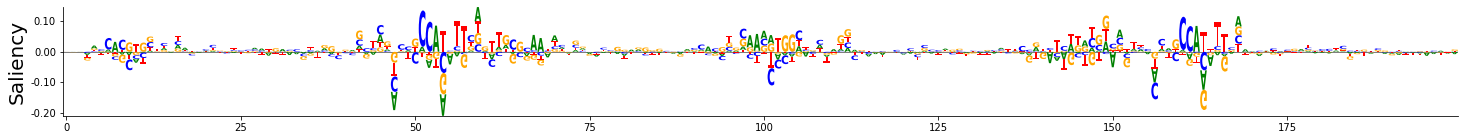

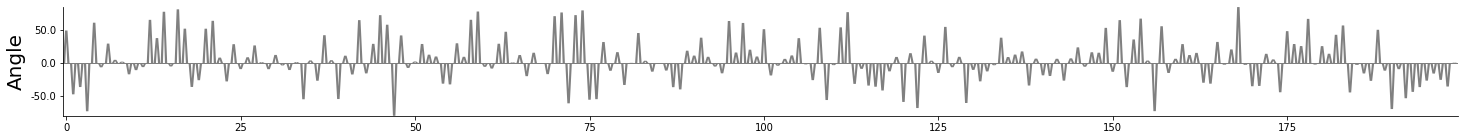

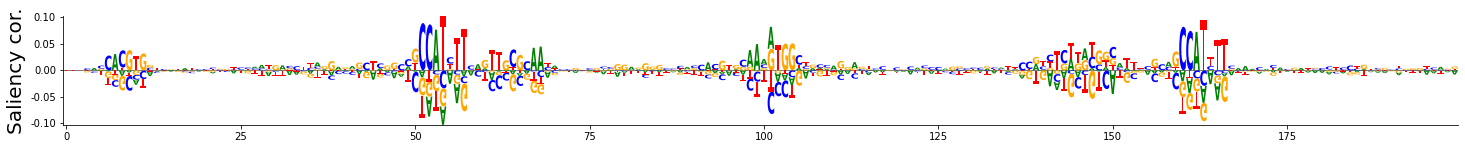

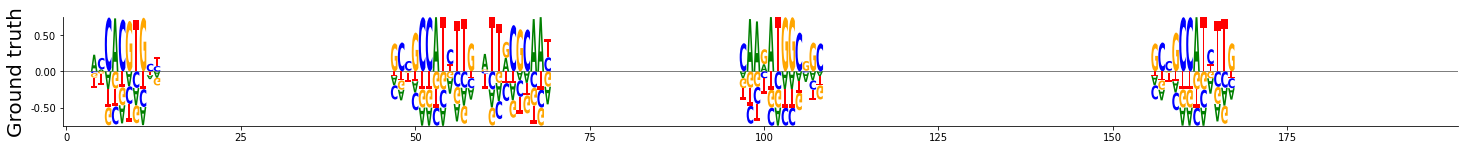

In [87]:
plot_synth_sequences(saliency_map_raw, saliency_map_raw_CORRECTED, ground_truth, sine, run_, s)

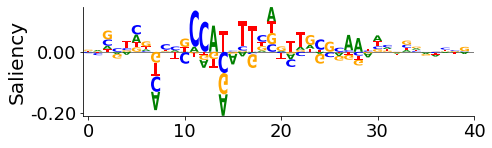

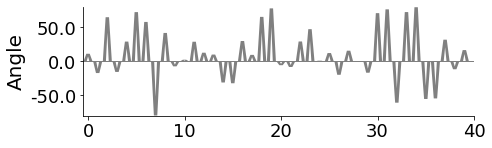

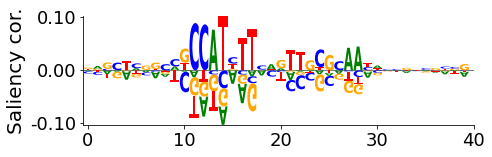

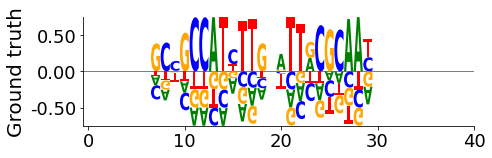

In [88]:
#Select a CUT (starting and ending nucleotide, from the graph above, to show a smaller snippet)
b1=40  
b2=80  # b2=b1+40 is suggested (length of 40)

plot_synth_sequences_cut('', saliency_map_raw, saliency_map_raw_CORRECTED, ground_truth, sine, run_, s, b1, b2)

# CNN-deep-relu

In [89]:
model_ = 'deep_relu'

In [90]:
saliency_map_raw = scores_saliency[model_]
sine = np.array(Angles[model_])
saliency_map_raw_CORRECTED = np.array(saliency_map_raw) - 0.25 * np.sum(saliency_map_raw, axis=-1, keepdims=True) 
ground_truth = results[model_]['X_model'] - 0.25 #uninformative positions ([0.25, 0.25, 0.25, 0.25] should correspond to [0,0,0,0] signal)

In [125]:
run_=20 #Pick a run
s=1 #Pick a sequence 

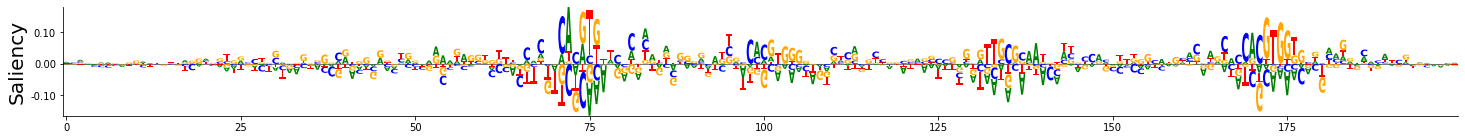

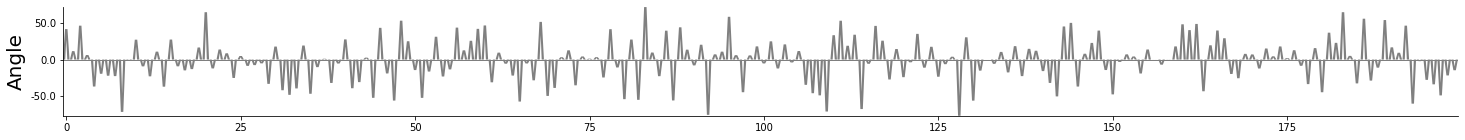

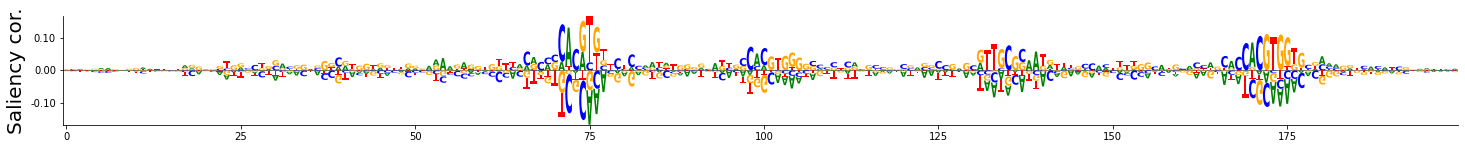

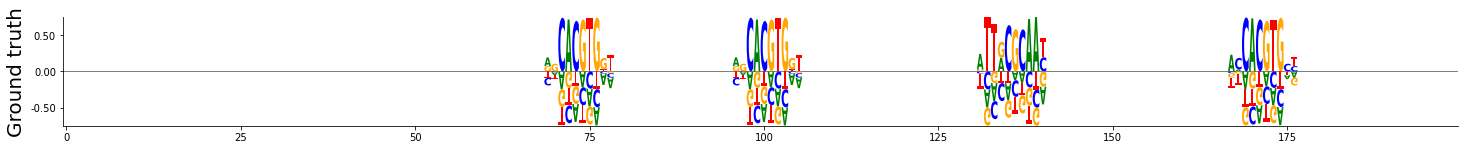

In [126]:
plot_synth_sequences(saliency_map_raw, saliency_map_raw_CORRECTED, ground_truth, sine, run_, s)

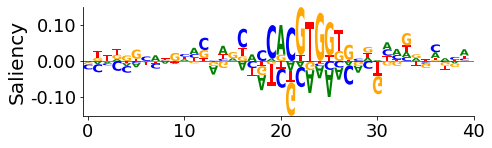

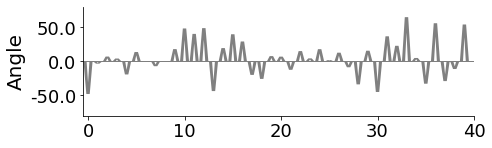

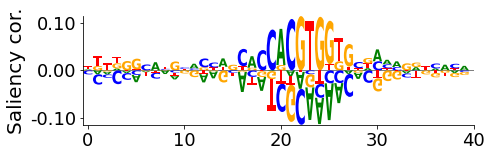

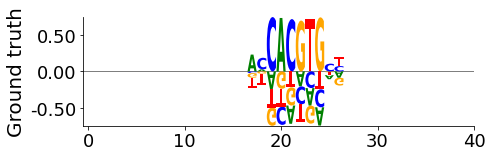

In [127]:
#Select a CUT (starting and ending nucleotide, from the graph above, to show a smaller snippet)
b1=150  
b2=190  # b2=b1+40 is suggested (length of 40)

plot_synth_sequences_cut('', saliency_map_raw, saliency_map_raw_CORRECTED, ground_truth, sine, run_, s, b1, b2)

# CNN-shallow-relu

In [128]:
model_ = 'shallow_relu'

In [129]:
saliency_map_raw = scores_saliency[model_]
sine = np.array(Angles[model_])
saliency_map_raw_CORRECTED = np.array(saliency_map_raw) - 0.25 * np.sum(saliency_map_raw, axis=-1, keepdims=True) 
ground_truth = results[model_]['X_model'] - 0.25 #uninformative positions ([0.25, 0.25, 0.25, 0.25] should correspond to [0,0,0,0] signal)

In [143]:
run_=1 #Pick a run
s=1 #Pick a sequence 

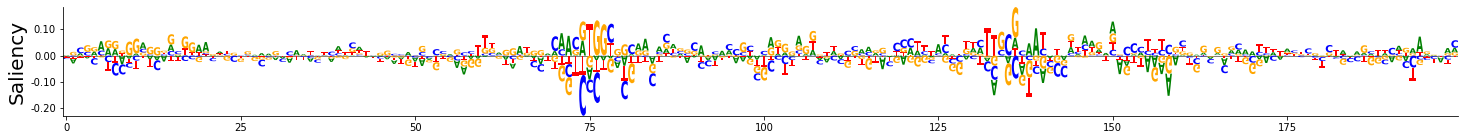

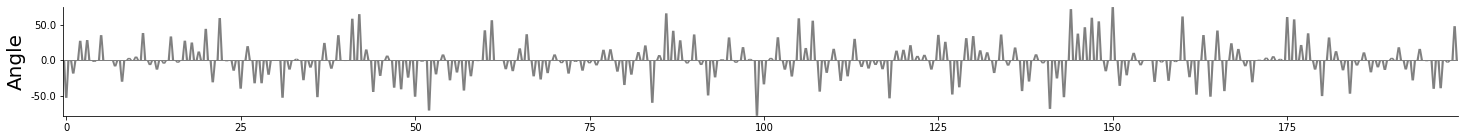

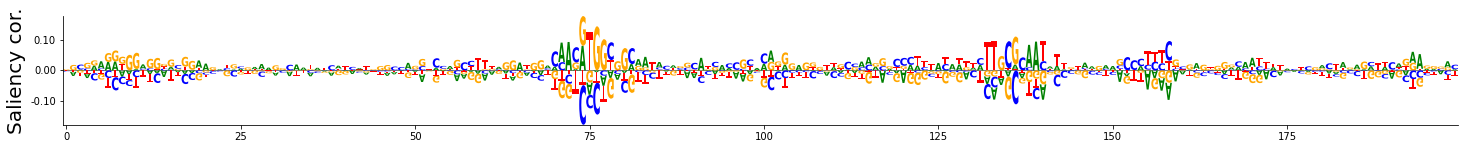

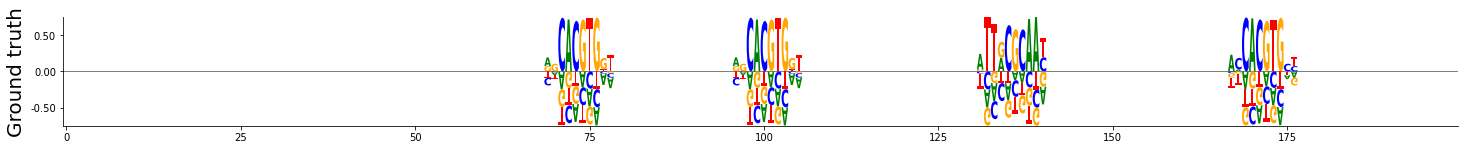

In [144]:
plot_synth_sequences(saliency_map_raw, saliency_map_raw_CORRECTED, ground_truth, sine, run_, s)

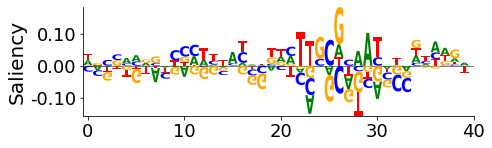

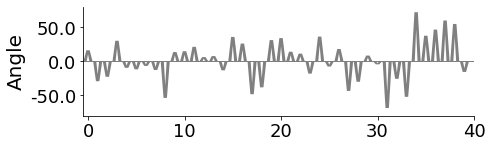

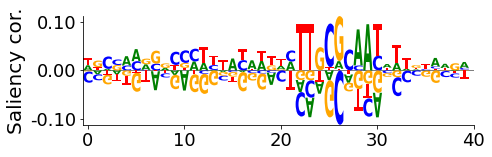

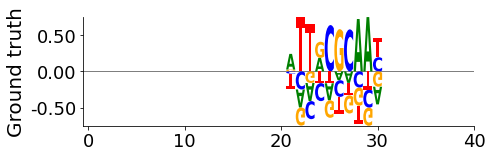

In [145]:
#Select a CUT (starting and ending nucleotide, from the graph above, to show a smaller snippet)
b1=110  
b2=150  # b2=b1+40 is suggested (length of 40)

plot_synth_sequences_cut('', saliency_map_raw, saliency_map_raw_CORRECTED, ground_truth, sine, run_, s, b1, b2)